# **使用线性回归、LGBM对印度二手车价格进行预测**


## **本项目包含**

* 数据处理
* 数据可视化
* 构建模型预测二手车价格

## **数据导入、查看和清洗**

### **数据说明**

* column 列名
* index 序号
* Name 汽车的品牌和型号。
* Location 该车正在销售或可购买的地点。
* Year 车型的年份或版本。
* Kilometers_Driven 前任车主驾驶该车的总公里数，单位为KM。
* Fuel_Type 汽车使用的燃料类型（汽油/柴油/电动/CNG/LPG）。
* Transmission 汽车使用的传动装置的类型。
* Owner_Type 车主是否为第一手、第二手或其他。
* Mileage 汽车公司提供的标准里程，单位是kmpl或km/kg。
* Engine 发动机的排量，单位是cc。
* Power 发动机的最大功率，单位是bhp。
* Seats 汽车中的座位数。
* New_Price 同一型号的新车的价格。
* Price 二手车的价格，单位是印度卢比。( train.csv)

### **导入训练集**

In [1]:
import pandas as pd
df_train = pd.read_csv('E:/数据分析/数据集/印度二手车数据集/train-data.csv')
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### **导入测试集**

In [2]:
df_test = pd.read_csv('E:/数据分析/数据集/印度二手车数据集/test-data.csv') 
df_test.drop('Unnamed: 0',axis=1,inplace=True)
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


### **合并数据**
先合并数据，方便清洗


In [3]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### **查看数据整体情况**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


**查看数据缺失情况**

In [5]:
all_data_na = (df.isnull().sum()/len(df))*100
all_data_na = all_data_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'缺失率' : all_data_na})
missing_data

,缺失率
New_Price,86.129877
Price,17.013650
Seats,0.730732
Engine,0.634220
Power,0.634220
Mileage,0.027575
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000


**从上面的数据分析可以看出，新车价格大面积啊缺失，缺失了86%,其余特征缺失率都较低**

**查看重复数据**

In [6]:
df.duplicated().sum()

1

发现有一个重复数据

## **处理数据**

### **总体处理**

In [7]:
# 去除重复值
df.drop_duplicates(inplace=True)

In [8]:
# 删去缺失价格列
df.drop('New_Price',axis=1,inplace=True)
df.drop("Name", axis=1, inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## 检查并处理缺失变量

Seats、Power、Engine、Mileage
含义为：
* Mileage 汽车公司提供的标准里程，单位是kmpl或km/kg。
* Engine 发动机的排量，单位是cc。
* Power 发动机的最大功率，单位是bhp。
* Seats 汽车中的座位数。
  
不着急做填充，先挨个检查变量，然后进行处理
首先是车座

In [9]:
df['Seats'].value_counts()

Seats
5.0     6046
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64

车座不可能为0，我们将其删除

In [10]:
df.drop(df[df['Seats']==0].index,axis=0,inplace=True)
df['Seats'].value_counts()

Seats
5.0     6046
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64

In [11]:
df['Seats'] = df['Seats'].fillna(df['Seats'].median())
df['Seats'].isnull().sum()

0

然后看看power，也就是发动机的最大功率
先把power的单位去除，再用中位数进行填补

In [12]:
df['Power'] = df['Power'].str.split(" ",expand=True)[0]
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')
df['Power'].isnull().sum()

174

In [13]:
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Power'].isnull().sum()

0

再来是Engine，发动机的排量，处理方式同上

In [14]:
df['Engine'] = df['Engine'].str.split(" ",expand=True)[0]
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')
df['Engine'].isnull().sum()

46

In [15]:
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Engine'].isnull().sum()

0

Mileage 汽车公司提供的标准里程，单位是kmpl或km/kg。

In [16]:
df['Mileage'] = df['Mileage'].str.split(" ",expand=True)[0]
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')
df['Mileage'].isnull().sum()

2

In [17]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Mileage'].isnull().sum()

0

In [18]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


## **Exploratory Data Analysis**


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **年份和价格**

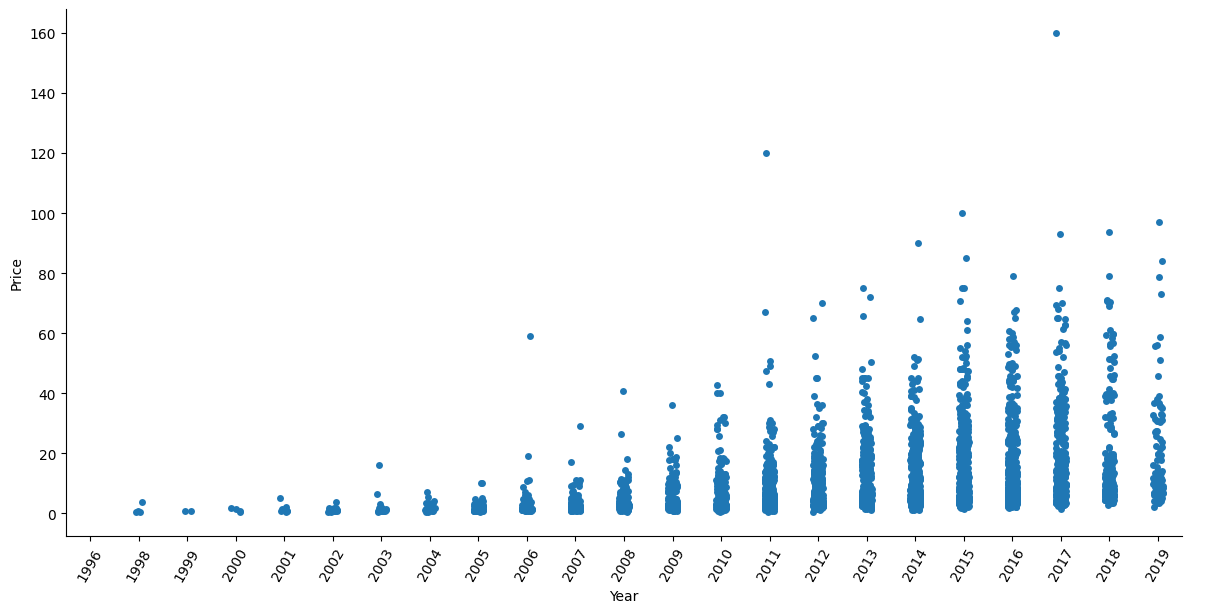

In [20]:
sns.catplot(x='Year', y='Price',height=6, aspect=2, data=df)
plt.xticks(rotation=60)
plt.show()

### **地区和价格**

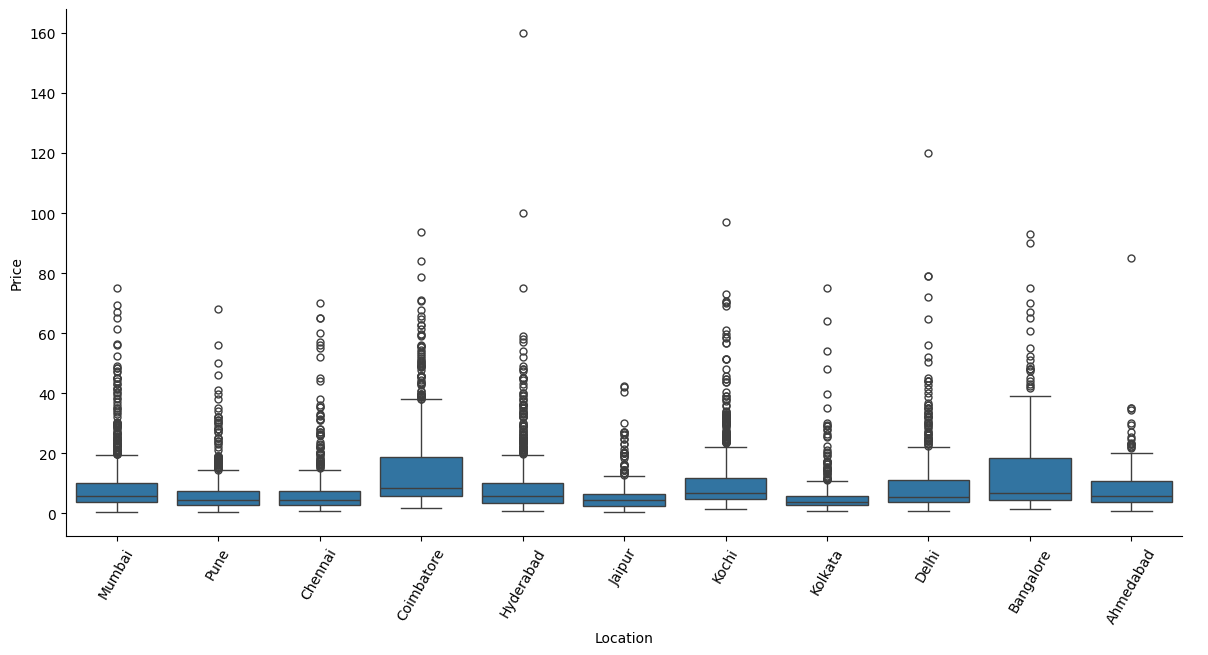

In [21]:
sns.catplot(x='Location', y='Price', kind="box",height=6, aspect=2, data=df)
plt.xticks(rotation=60)
plt.show()

### **已行驶里程和价格**

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

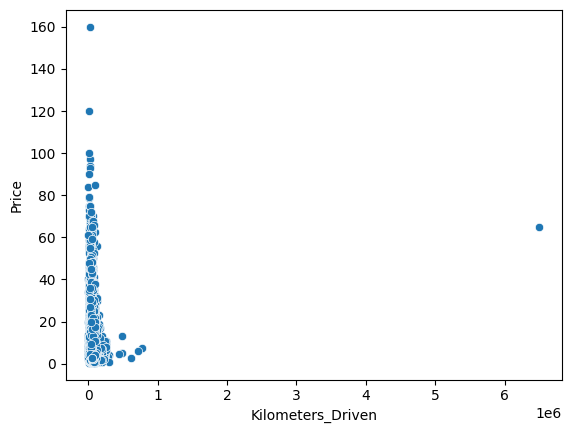

In [22]:
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)

我们发现有个异常点，行驶超过了600万公里，我们以100W公里为分界线，将超出部分剔除再看看

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

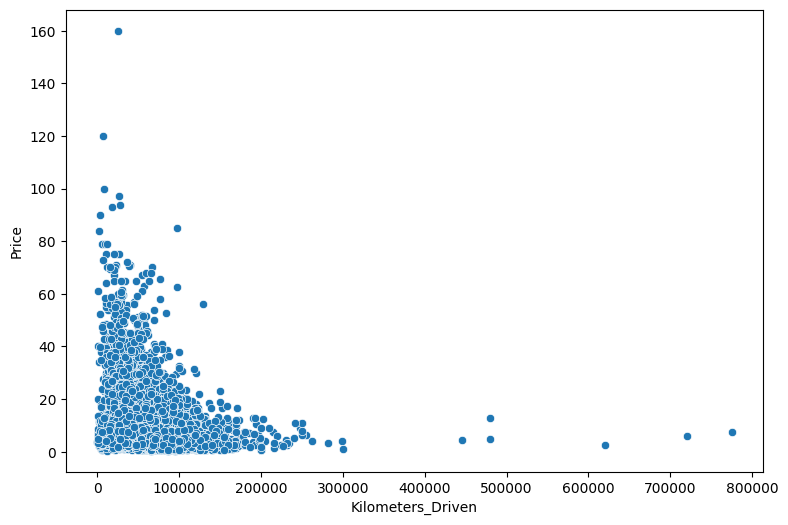

In [23]:
df = df[df['Kilometers_Driven'] > 0]
df = df[df['Kilometers_Driven'] < 1000000]
plt.figure(figsize=(9,6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)

### **燃料类型和价格**

Fuel_Type 汽车使用的燃料类型（汽油/柴油/电动/CNG/LPG）。


In [24]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3851
Petrol      3323
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

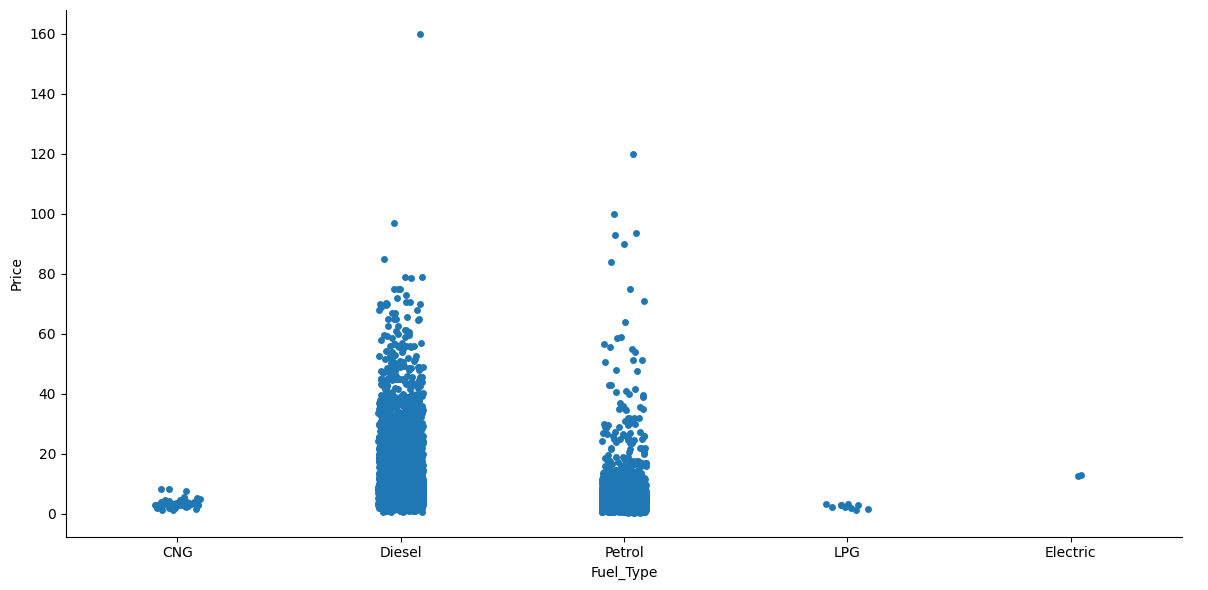

In [25]:
sns.catplot(x='Fuel_Type', y='Price', jitter=True,height=6, aspect=2, data=df);

### **传动装置类型**

Transmission 汽车使用的传动装置的类型。

In [26]:
df['Transmission'].value_counts()

Transmission
Manual       5203
Automatic    2047
Name: count, dtype: int64

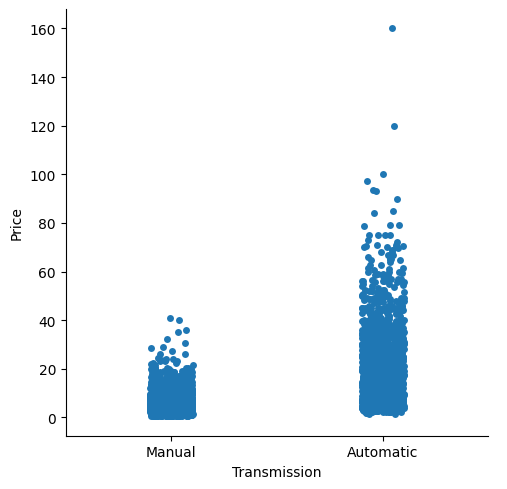

In [27]:
sns.catplot(x="Transmission", y='Price', data=df);

### **几手车主**

In [28]:
df['Owner_Type'].value_counts()

Owner_Type
First             5949
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

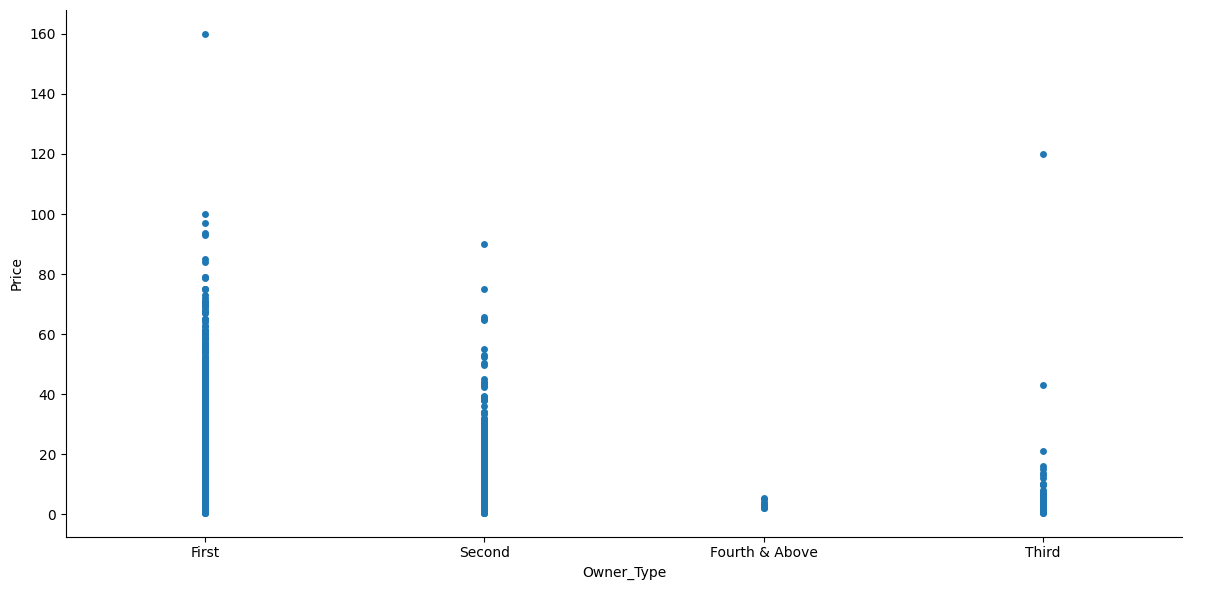

In [29]:
sns.catplot(x='Owner_Type', y='Price', jitter=False,height=6, aspect=2, data=df);

### **Mileage与价格**

Mileage 汽车公司提供的标准里程，单位是kmpl或km/kg。

<Axes: xlabel='Mileage', ylabel='Price'>

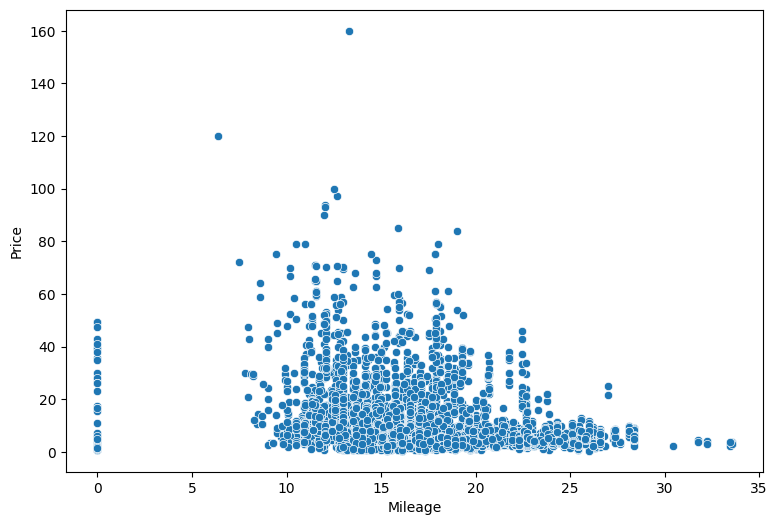

In [30]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Mileage', y='Price', data=df)

### **发动机排量与价格**

Engine 发动机的排量，单位是cc。

<Axes: xlabel='Engine', ylabel='Price'>

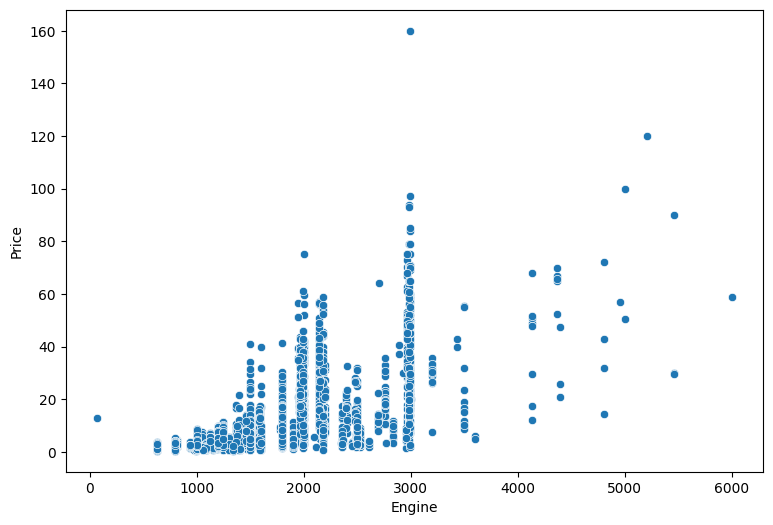

In [31]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Engine', y='Price', data=df)

### **发动机功率与价格**

<Axes: xlabel='Power', ylabel='Price'>

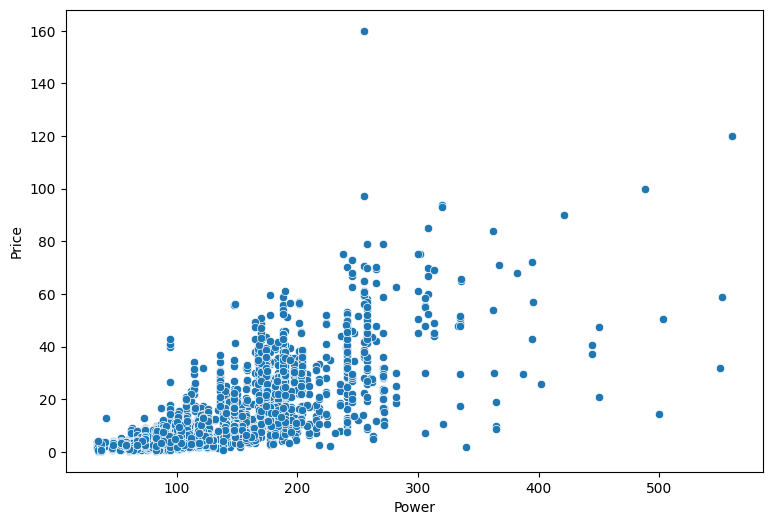

In [32]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Power', y='Price', data=df)

### **座位数目与价格**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2.0'),
  Text(1, 0, '4.0'),
  Text(2, 0, '5.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '7.0'),
  Text(5, 0, '8.0'),
  Text(6, 0, '9.0'),
  Text(7, 0, '10.0')])

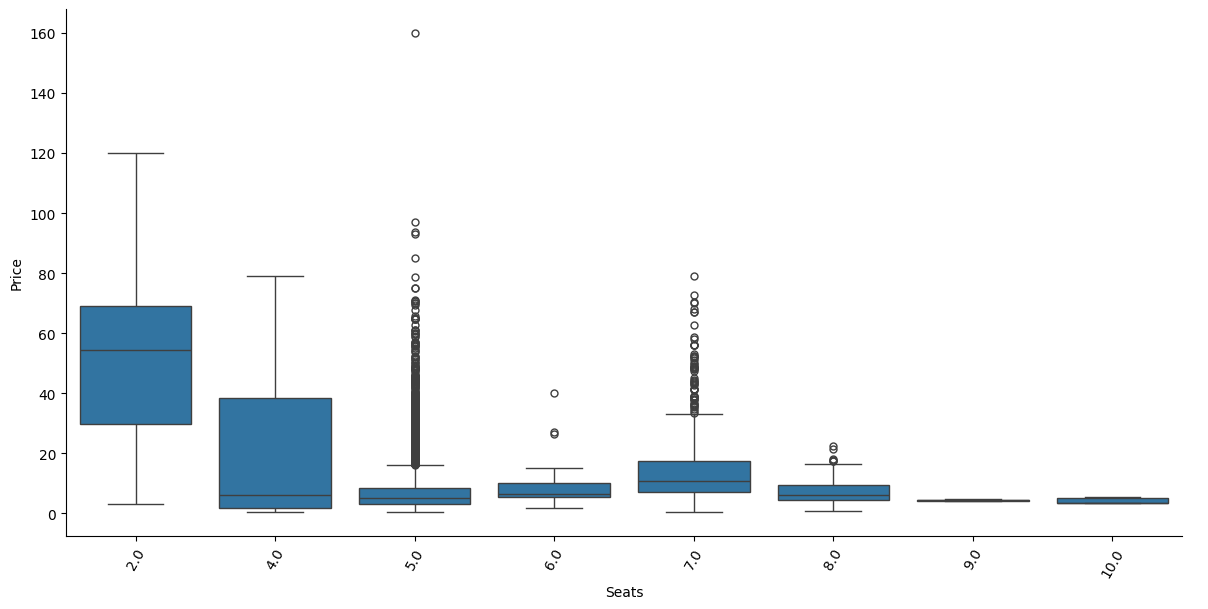

In [33]:
sns.catplot(x='Seats', y='Price', kind="box",height=6, aspect=2, data=df)
plt.xticks(rotation=60)

## **特征编码**


In [34]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [35]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
for feat in ['Fuel_Type', 'Location','Owner_Type', 'Transmission', 'Year']:
    lbl = LabelEncoder()
    lbl.fit(df[feat])
    df[feat] = lbl.transform(df[feat])
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,13,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,18,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,14,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,2,15,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,3,16,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


## **数据切分**

In [36]:
df_train = df[~df['Price'].isnull()]
df_train = df_train.reset_index(drop=True)
df_test = df[df['Price'].isnull()]
df_train.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,13,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,18,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,14,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,2,15,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,3,16,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [37]:
no_features = ['Price']
# 输入特征列
features = [col for col in df_train.columns if col not in no_features]

X = df_train[features] # 训练集输入
y = df_train['Price']# 训练集标签
X_test = df_test[features] # 测试集输入

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2022)

## **模型建立**

### **线性回归**

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_val)
print("Score on Traing set: ",lr.score(X_train,y_train))
print("Score on valid set: ",lr.score(X_val,y_val))

Score on Traing set:  0.702077663498507
Score on valid set:  0.6982662108270833


In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_pred,y_val))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_pred,y_val))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_pred,y_val)))
print('R Squared Error          : ', metrics.r2_score(y_pred,y_val))

		Error Table
Mean Absolute Error      :  3.8191025211012644
Mean Squared  Error      :  35.51327770962244
Root Mean Squared  Error :  5.959301780378507
R Squared Error          :  0.6092807923898613


### **LGBM**

In [56]:
params = {
    'learning_rate':0.1,
    'n_estimators':1000,
    'max_depth': 15,
    'metric': 'mse',
    'verbosity': -1,
    'seed': 2022,
    'n_jobs': -1,
}

In [60]:
import lightgbm as lgb
model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100)])
y_pred = model.predict(X_val, num_iteration=model.best_iteration_)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[253]	training's rmse: 1.52763	training's l2: 2.33365	valid_1's rmse: 3.09248	valid_1's l2: 9.5634


In [62]:
print("Score on Traing set: ",model.score(X_train,y_train))
print("Score on valid set: ",model.score(X_val,y_val))

Score on Traing set:  0.9815388772454189
Score on valid set:  0.9187458418102552


In [63]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_pred,y_val))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_pred,y_val))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_pred,y_val)))
print('R Squared Error          : ', metrics.r2_score(y_pred,y_val))

		Error Table
Mean Absolute Error      :  1.4166114668742893
Mean Squared  Error      :  9.563401874094804
Root Mean Squared  Error :  3.092475040173292
R Squared Error          :  0.9122361874546977


## **使用LGBM模型预测二手车价格**

In [65]:
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration_)

In [67]:
test = {'price': y_pred_test}
test = pd.DataFrame(test)
test.head(20)

,price
0,1.130311
1,2.619933
2,18.109607
3,4.204025
4,4.231149
5,12.194486
6,21.655197
7,2.546421
8,3.526734
9,11.871418
